# DryCode

Data Analytics Internship.

TASK 2: Store Sales Forecasting

BY: VAISHNAVI AGRAWAL

# Importing The Necessary Libraries

In [35]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# loading the data set

In [36]:
train = 'C:\\Users\\MITTAL\\Downloads\\archive (4)\storesalestrain.csv'
test = 'C:\\Users\\MITTAL\\Downloads\\archive (4)\storesales.csv'
df_train = pd.read_csv(train)
df_test = pd.read_csv(test)

In [3]:
df_train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
df_train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [5]:
type(df_train.Date)

pandas.core.series.Series

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [7]:
df_train.Date = pd.to_datetime(df_train.Date)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


In [8]:
df_test.Date = pd.to_datetime(df_test.Date)

In [9]:
df_train.shape

(188340, 10)

In [10]:
def dateSep(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['dayofweek'] = df['Date'].dt.dayofweek

dateSep(df_train)
dateSep(df_test)

In [11]:
df_train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day,dayofweek
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1,0
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1,0
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1,0
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1,0
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1,0


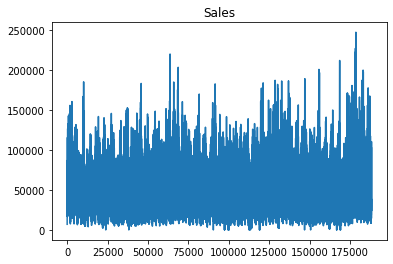

In [12]:
plt.Figure()
plt.title('Sales')
plt.plot(df_train['Sales'])
plt.show()

In [13]:
dftrain2 = df_train.copy()
dftest2 = df_test.copy()

In [14]:
y = pd.DataFrame(dftrain2.Sales)
dftrain2.drop(['Sales'], axis=1, inplace=True)
dftrain2.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Year,Month,Day,dayofweek
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,2018,1,1,0
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,2018,1,1,0
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,2018,1,1,0
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,2018,1,1,0
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,2018,1,1,0


In [15]:
from sklearn.preprocessing import LabelEncoder
cat_cols = [cname for cname in dftrain2.columns if
           dftrain2[cname].dtype == 'object']
encoder = LabelEncoder()
for col in cat_cols:
    dftrain2[col] = encoder.fit_transform(dftrain2[col])
    dftest2[col] = encoder.fit_transform(dftest2[col])

In [16]:
dftrain2.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Year,Month,Day,dayofweek
0,0,1,0,2,0,2018-01-01,1,1,9,2018,1,1,0
1,1,253,3,1,0,2018-01-01,1,1,60,2018,1,1,0
2,2,252,2,1,0,2018-01-01,1,1,42,2018,1,1,0
3,3,251,1,2,0,2018-01-01,1,1,23,2018,1,1,0
4,4,250,1,2,3,2018-01-01,1,1,62,2018,1,1,0


In [17]:
dftrain2.drop(['Date', 'ID'], axis=1, inplace=True)

In [18]:
dftest2.drop(['Date'], axis=1, inplace=True)

In [19]:
dftrain3 = dftrain2.copy()

In [20]:
dftrain3 = np.array(dftrain3)
dftest2  = np.array(dftest2)

In [21]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=300, output_distribution='uniform')
dftrain3 = qt.fit_transform(dftrain3)
dftest2 = qt.transform(dftest2)

qty = QuantileTransformer(n_quantiles=300, output_distribution='uniform')
y = qty.fit_transform(y)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dftrain2 = scaler.fit_transform(dftrain2)
dftest2 = scaler.transform(dftest2)
y_scaler = MinMaxScaler()
y_sc = y_scaler.fit_transform(y)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train_ini, y_valid_ini = train_test_split(dftrain3, y, test_size=0.3, random_state=200)
x_train.shape, x_valid.shape

((131838, 11), (56502, 11))

In [24]:
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
X_train.shape

(131838, 11, 1)

In [25]:
X_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))
X_valid.shape

(56502, 11, 1)

In [26]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Input
from tensorflow.keras import Model

In [27]:
checkpoint_filepath = 'best.h5'
save_model_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True)

In [28]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=100, min_lr=0.0005, verbose=1, mode='min')

In [29]:
# build model
def create_lstm_model():
    init = Input(shape=(X_train.shape[-2], X_train.shape[-1]))
    lstm = Bidirectional(LSTM(940, return_sequences=True))(init)
    lstm = Bidirectional(LSTM(540, return_sequences=True))(lstm)
    lstm = Dropout(0.02)(lstm)
    lstm = Dense(512, activation='swish')(lstm)
    lstm = Dense(1)(lstm)
    
    model = Model(inputs=init, outputs=lstm)
    model.compile(optimizer='Adam', loss='mae')
    return model

In [30]:
# global variables
BATCH_SIZE = 512
SEED = 200
EPOCHS = 100

In [31]:
es = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min', restore_best_weights=True)

In [32]:
model = create_lstm_model()
model.fit(X_train, y_train_ini, validation_data=(X_valid, y_valid_ini), batch_size=BATCH_SIZE,
          epochs=EPOCHS, shuffle=True, callbacks=[es, save_model_callback, reduce_lr])

2021-10-18 21:51:18.470658: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 21:51:18.558302: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 21:51:18.559078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 21:51:18.561104: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/100


2021-10-18 21:51:28.782628: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


258/258 [==============================] - 39s 126ms/step - loss: 0.1923 - val_loss: 0.1295

Epoch 00001: val_loss improved from inf to 0.12953, saving model to best.h5
Epoch 2/100
258/258 [==============================] - 31s 122ms/step - loss: 0.0981 - val_loss: 0.0822

Epoch 00002: val_loss improved from 0.12953 to 0.08218, saving model to best.h5
Epoch 3/100
258/258 [==============================] - 31s 122ms/step - loss: 0.0718 - val_loss: 0.0703

Epoch 00003: val_loss improved from 0.08218 to 0.07030, saving model to best.h5
Epoch 4/100
258/258 [==============================] - 31s 122ms/step - loss: 0.0688 - val_loss: 0.0656

Epoch 00004: val_loss improved from 0.07030 to 0.06559, saving model to best.h5
Epoch 5/100
258/258 [==============================] - 31s 122ms/step - loss: 0.0642 - val_loss: 0.0658

Epoch 00005: val_loss did not improve from 0.06559
Epoch 6/100
258/258 [==============================] - 31s 122ms/step - loss: 0.0636 - val_loss: 0.0603

Epoch 00006: va

In [33]:
from tensorflow.keras.models import load_model
modell = load_model('best.h5')

In [34]:
pred = modell.predict(dftest2)
pred_reshape = pred.reshape(-1,1)
pred_reshape.shape

(244915, 1)

In [35]:
preds = y_scaler.inverse_transform(pred_reshape)
preds = qty.inverse_transform(preds)

In [36]:
preds.shape

(244915, 1)

In [37]:
output = pd.DataFrame({'Sales': preds[:,0]})
path = 'output.csv'
output.to_csv(path, index=False)
output

,Sales
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
244910,0.000000
244911,15256.312500
244912,0.000000
244913,0.000000
